In [1]:
import os
import json
import scipdf
from pypdf import PdfReader

### data etc

In [2]:
pub = []
with open('../data/interim/publications.ndjson') as fin:
    for line in fin:
        json_obj = json.loads(line)
        pub.append(json_obj)

parsed_paths = [art['path'] for art in pub]

In [3]:
with open('../data/interim/failed_pdf_paths.txt') as fin:
    failed_paths = [line.strip() for line in fin]

with open('../data/interim/non_pdf_paths.txt') as fin:
    non_pdf_paths = [line.strip() for line in fin]

In [4]:
[
    len(parsed_paths),
    len(non_pdf_paths),
    len(failed_paths),
]

[154, 23, 120]

### what's going on with the failed ones?

In [5]:
sample_fail = os.path.join('..', failed_paths[0])

sci = scipdf.parse_pdf_to_dict(sample_fail)
rea = PdfReader(sample_fail)


In [6]:
[
    sample_fail,
    sci,
    rea.pages[0].extract_text()
]

['../data/raw/UF papers 1969-2004 copy/1987/Frith, A developmental model for autism.pdf',
 None,
 '']

They are just empty.
- But OCR has been done (can be seen when browsing the pdf)
- `Acrobat 4.0 Scan Plug-in for Windows` probably used for this
- maybe content got hidden somehow?

### abstracts

In [7]:
pub[4]

{'title': 'Autism spectrum disorder and psychopathy : shared cognitive underpinnings or double hit ?',
 'authors': 'J O H N R O G E R S; E S S I V I D I N G; T A F R I T H 2 A N D F R A N C E S C A H A P P É; Essi Viding; H Asperger; S Baron-Cohen; S Baron-Cohen; H Tager-Flusberg; D J Cohen; S Berthoz; J L Armony; R J Blair; R J Dolan; S K Berument; M Rutter; C Lord; A Pickles; A Bailey; D Bishop; C F Norbury; R Blair; R J Blair; R J Blair; R J Blair; R J Blair; L Cipolotti; R J Blair; E Colledge; D G Mitchell; R J Blair; E Colledge; L Murray; D G Mitchell; S A Cooper; W N Mohamed; R A Collacott; M R Dadds; J Fraser; A Frost; D J Hawes; G Dawson; K Toth; R Abbott; J Osterling; J Munson; A Estes; J Liaw; M Dewey; P J Frick; R D Hare; U Frith; U Frith; R Goodman; D A Grant; E A Berg; I Hall; J Bernal; R D Hare; S D Hart; R D Hare; D M Stoff; J Breiling; J D Maser; H C Heims; H D Critchley; R Dolan; C J Mathias; L Cipolotti; E L Hill; K Hippler; C Klicpera; C Hughes; J Russell; T W Robbin

In [8]:
abs = []
fss = []

for article in pub:

    abstract = article['abstract']
    first_section = article['sections'][0]

    abs.append(abstract)
    fss.append(first_section)

In [14]:
[
    len([i for i in abs if i]),
    len([i for i in fss if i])
]

[119, 154]

In [17]:
len(article['sections'][0]['heading'])

12

In [16]:
len(article['sections'][0]['text'])

6487

<Axes: ylabel='Density'>

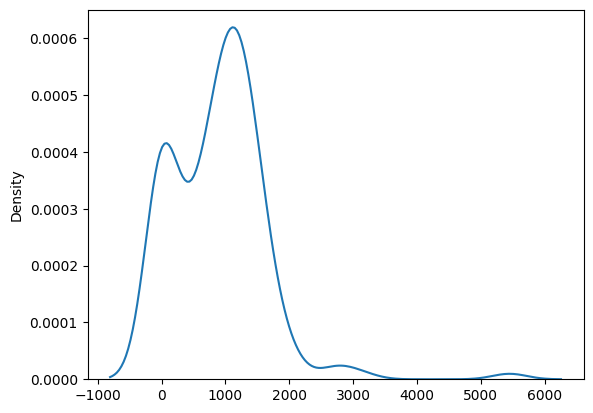

In [26]:
import seaborn as sns

abs_lengths = [len(art['abstract']) for art in pub]
sns.kdeplot(abs_lengths)